In [1]:
from community import community_louvain
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np
from torch_geometric.utils.convert import to_networkx
from torch_geometric.datasets import Planetoid

/home/newdisk/jxh/anaconda/envs/sn/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = Planetoid(root='./', name='Cora')
data = dataset[0]
G = to_networkx(data)
G_undirected = G.to_undirected()
pos = nx.spring_layout(G)

中心性

In [3]:
# degree_centrality
def degree(G, pos):
    degree_dict = nx.degree_centrality(G)
    max_center_value = max(degree_dict.values())
    color = []
    for i in degree_dict.keys():
        if degree_dict[i] > max_center_value*0.5:
            color.append("r")
        elif degree_dict[i] > max_center_value*0.25:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("degree centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    # plt.show()
    return 

# eigenvector_centrality
def eigen(G, pos):
    dict = nx.eigenvector_centrality(G)
    max_center_value = max(dict.values())
    color = []
    for i in dict.keys():
        if dict[i] > max_center_value*0.5:
            color.append("r")
        elif dict[i] > max_center_value*0.25:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("eigenvector centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    return 

# Katz_centrality
def katz(G, alpha, pos, beta = 1):
    dict = nx.katz_centrality(G, alpha, beta)
    max_center_value = max(dict.values())
    color = []
    for i in dict.keys():
        if dict[i] > max_center_value*0.5:
            color.append("r")
        elif dict[i] > max_center_value*0.25:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("Katz centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    return 

# pagerank_centrality
def pagerank(G, pos, alpha = 0.85):
    dict = nx.pagerank(G, alpha)
    max_center_value = max(dict.values())
    color = []
    for i in dict.keys():
        if dict[i] > max_center_value*0.5:
            color.append("r")
        elif dict[i] > max_center_value*0.25:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("pagerank centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    return 

# betweenness_centrality
def between(G, pos):
    dict = nx.betweenness_centrality(G)
    max_center_value = max(dict.values())
    color = []
    for i in dict.keys():
        if dict[i] > max_center_value*0.5:
            color.append("r")
        elif dict[i] > max_center_value*0.25:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("betweenness centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    return 

# closeness_centrality
def close(G, pos):
    dict = nx.closeness_centrality(G)
    max_center_value = max(dict.values())
    color = []
    for i in dict.keys():
        if dict[i] > max_center_value*0.5:
            color.append("r")
        elif dict[i] > max_center_value*0.25:
            color.append("c")
        else:
            color.append([0.5, 0.5, 0.5])  # grey
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("closeness centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()
    return 


/home/newdisk/jxh/anaconda/envs/sn/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


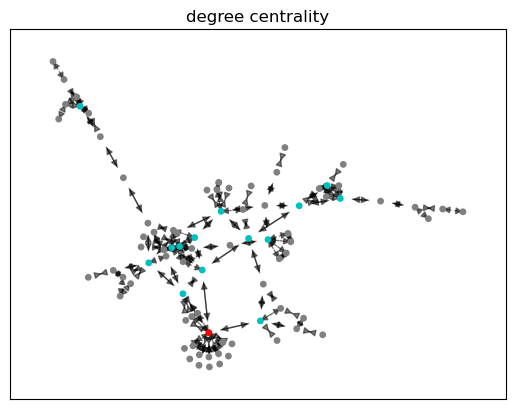

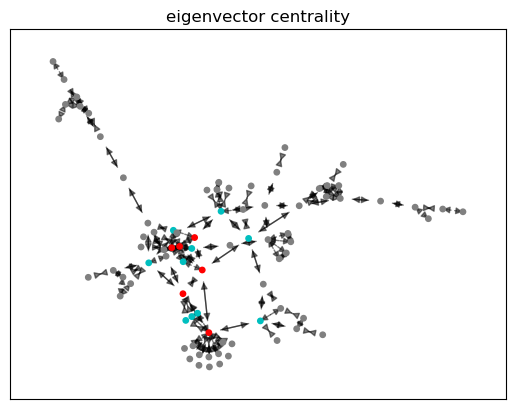

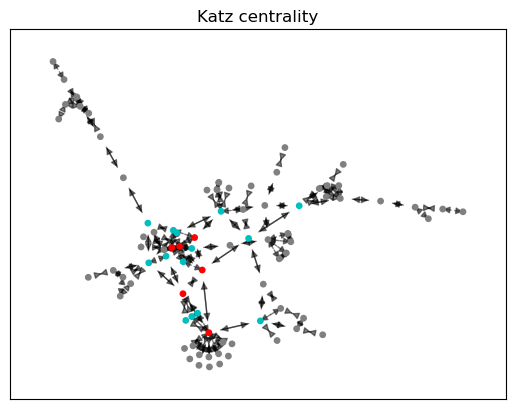

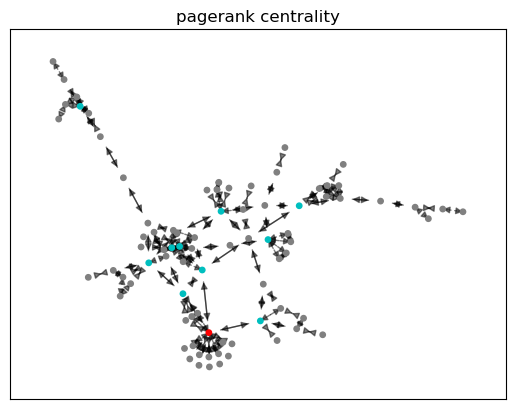

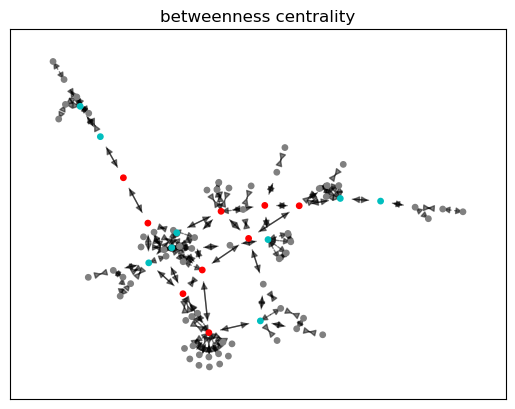

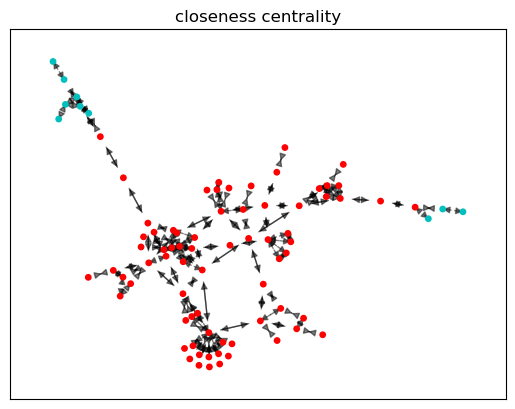

In [4]:
partition = community_louvain.best_partition(G.to_undirected())
## 以社区1为例进行展示
subnode = []
for i in partition.keys():
    if partition[i] == 1:
        subnode.append(i)
subG = G.subgraph(subnode)
subpos = nx.spring_layout(subG)

degree(subG, subpos)

eigen(subG, subpos)

w, v = np.linalg.eig(nx.to_numpy_matrix(subG))
rho = max(abs(w))
alpha = 0.85/rho
katz(subG, alpha, subpos)

pagerank(subG, subpos)

between(subG, subpos)

close(subG, subpos)

属性度量与可视化

In [5]:
# Clustering
print(G)
Clus = nx.average_clustering(G)
print("Clustering:", Clus)

DiGraph with 2708 nodes and 10556 edges
Clustering: 0.24067329850193728


Average distance between nodes: 6.310310801906627


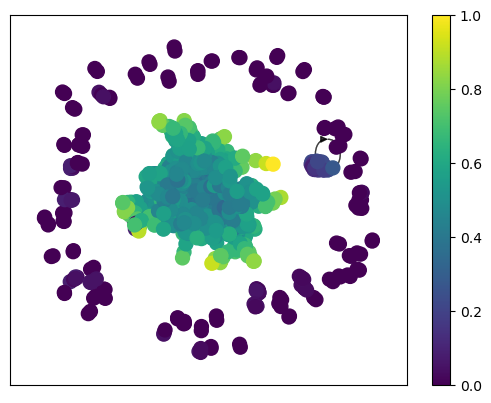

In [6]:
# Average distance
path_lengths = dict(nx.all_pairs_shortest_path_length(G))
total_distance = 0
num_pairs = 0

for source, lengths in path_lengths.items():
    for target, length in lengths.items():
        if source != target:
            total_distance += length
            num_pairs += 1

average_distance = total_distance / num_pairs

print(f"Average distance between nodes: {average_distance}")

# Create a color map based on the shortest path lengths
color_map = []
for node in G:
    node_distances = path_lengths[node].values()
    avg_distance = np.mean([d for d in node_distances if d > 0])
    color_map.append(avg_distance)

# Normalize color map to range [0, 1]
norm_color_map = (color_map - np.min(color_map)) / (np.max(color_map) - np.min(color_map))

nodes = nx.draw_networkx_nodes(G, pos, node_color=norm_color_map, cmap=plt.cm.viridis, node_size=100)
edges = nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.colorbar(nodes)
plt.show()


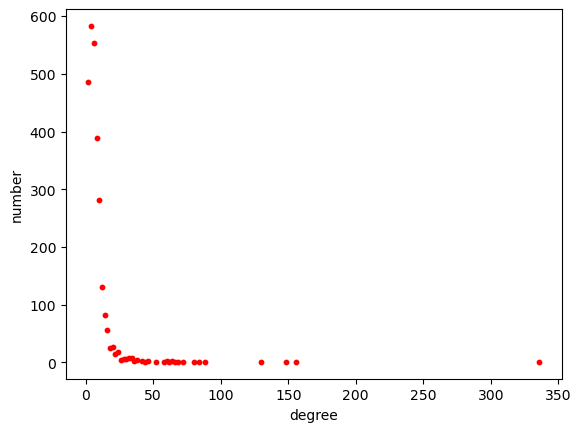

In [7]:
# Degree
# 存储度数相应点数
number = []
# 存储度数
degree = []
for i in nx.degree_histogram(G):
    number.append(i)
for j in range(len(nx.degree_histogram(G))):
    degree.append(j)
# 去掉number=0,并取log
xy = {}
for i in range(len(degree)):
    if (number[i] != 0):
        xy[degree[i]] = number[i]

# 作图
fig = plt.figure()
ax1 = fig.add_subplot(111)
# ax1.set_title(str(args.type))
plt.xlabel("degree")
plt.ylabel("number")
plt.scatter(xy.keys(), xy.values(), c="red", s=10)
plt.show()